In [19]:
!kaggle datasets download -d agungpambudi/network-malware-detection-connection-analysis

Dataset URL: https://www.kaggle.com/datasets/agungpambudi/network-malware-detection-connection-analysis
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 715M/720M [00:13<00:00, 71.7MB/s]
100% 720M/720M [00:13<00:00, 55.0MB/s]


In [20]:
!unzip ./network-malware-detection-connection-analysis.zip

Archive:  ./network-malware-detection-connection-analysis.zip
  inflating: CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv  
  inflating: CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv  
  inflating: CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv  
  inflating: CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv  
  inflating: CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv  
  inflating: CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv  
  inflating: CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv  
  inflating: CTU-IoT-Malware-Capture-44-1conn.log.labeled.csv  
  inflating: CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv  
  inflating: CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv  
  inflating: CTU-IoT-Malware-Capture-8-1conn.log.labeled.csv  
  inflating: CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv  


In [2]:
!kaggle datasets download -d engraqeel/iot23preprocesseddata

Dataset URL: https://www.kaggle.com/datasets/engraqeel/iot23preprocesseddata
License(s): unknown
 97% 177M/183M [00:01<00:00, 112MB/s]
100% 183M/183M [00:01<00:00, 125MB/s]


In [3]:
!unzip ./iot23preprocesseddata.zip

Archive:  ./iot23preprocesseddata.zip
  inflating: iot23_combined_new.csv  


In [4]:
!ls -hl

total 3.9G
-rw-r--r-- 1 root root 133M Dec 26  2023 CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv
-rw-r--r-- 1 root root 397K Dec 26  2023 CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv
-rw-r--r-- 1 root root 406K Dec 26  2023 CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv
-rw-r--r-- 1 root root  23M Dec 26  2023 CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv
-rw-r--r-- 1 root root 2.9M Dec 26  2023 CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv
-rw-r--r-- 1 root root 1.3G Dec 26  2023 CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv
-rw-r--r-- 1 root root 555K Dec 26  2023 CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv
-rw-r--r-- 1 root root  30K Dec 26  2023 CTU-IoT-Malware-Capture-44-1conn.log.labeled.csv
-rw-r--r-- 1 root root 499M Dec 26  2023 CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv
-rw-r--r-- 1 root root 443M Dec 26  2023 CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv
-rw-r--r-- 1 root root 1.3M Dec 26  2023 CTU-IoT-Malware-Capture-8-1conn.log.labeled.csv
-r

In [4]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [5]:
import os

In [ ]:
# df = []

# for path in os.listdir('./'):
#     if not path.startswith("CTU"):
#         continue

#     temp = pd.read_csv(path, sep="|", low_memory=False)
#     df.append(temp)

# df = pd.concat(df)
# df.head()

In [ ]:
df = pd.read_csv("./CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv", sep="|")

In [27]:
df = pd.read_csv("./iot23_combined_new.csv")

<ipython-input-27-2fe366e7ea82>:1: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./iot23_combined_new.csv")


In [28]:
df.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,0.000003,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


In [8]:
df.shape

(6046623, 22)

In [9]:
df.dtypes

,0
Unnamed: 0,int64
ts,float64
uid,object
id.orig_h,object
id.orig_p,float64
id.resp_h,object
id.resp_p,float64
proto,object
service,object
duration,object


In [11]:
df['label'].value_counts()

,count
label,
PartOfAHorizontalPortScan,3389036
Okiru,1313012
Benign,688812
DDoS,638506
C&C,15286
C&C-HeartBeat,1332
Attack,538
C&C-FileDownload,46
C&C-Torii,30


In [ ]:
# df['label_target'] = df['label'].apply(lambda x: 1 if x == 'Malicious' else 0)

In [29]:
df['duration'] = pd.to_numeric(df['duration'].str.replace('-','-1'))
df['orig_bytes'] = pd.to_numeric(df['orig_bytes'], errors='coerce')
df['resp_bytes'] = pd.to_numeric(df['resp_bytes'], errors='coerce')
df['orig_pkts'] = pd.to_numeric(df['orig_pkts'])
df['orig_ip_bytes'] = pd.to_numeric(df['orig_ip_bytes'])
df['resp_pkts'] = pd.to_numeric(df['resp_pkts'])
df['resp_ip_bytes'] = pd.to_numeric(df['resp_ip_bytes'])
df['ts'] = pd.to_datetime(df['ts'], unit='s')

df = pd.concat([df, pd.get_dummies(df['proto'])], axis=1)
df['icmp'] = pd.to_numeric(df['icmp'])
df['tcp'] = pd.to_numeric(df['tcp'])
df['udp'] = pd.to_numeric(df['udp'])

In [30]:
params = ['duration','orig_bytes','resp_bytes', 'orig_pkts', 'orig_ip_bytes','resp_pkts','resp_ip_bytes','icmp','tcp','udp']
label = 'label'

In [31]:
df['label'].value_counts()

,count
label,
PartOfAHorizontalPortScan,3389036
Okiru,1313012
Benign,688812
DDoS,638506
C&C,15286
C&C-HeartBeat,1332
Attack,538
C&C-FileDownload,46
C&C-Torii,30


In [32]:
df_train = pd.concat([
    df[df['label'] == 'PartOfAHorizontalPortScan'].sample(15000),
    df[df['label'] == 'Okiru'].sample(15000),
    df[df['label'] == 'Benign'].sample(15000),
    df[df['label'] == 'DDoS'].sample(15000),
    df[df['label'] == 'C&C'].sample(15000),
    df[df['label'] == 'C&C-HeartBeat'],
])

In [33]:
df_test = pd.concat([
    df[df['label'] == 'PartOfAHorizontalPortScan'].sample(1000),
    df[df['label'] == 'Okiru'].sample(1000),
    df[df['label'] == 'Benign'].sample(1000),
    df[df['label'] == 'DDoS'].sample(1000),
    df[df['label'] == 'C&C'].sample(1000),
    df[df['label'] == 'C&C-HeartBeat'],
])

In [35]:
df_train['label'].value_counts()

,count
label,
PartOfAHorizontalPortScan,15000
Okiru,15000
Benign,15000
DDoS,15000
C&C,15000
C&C-HeartBeat,1332


In [36]:
X = df_train[params]
y = df_train[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [37]:
X.dtypes

,0
duration,float64
orig_bytes,float64
resp_bytes,float64
orig_pkts,float64
orig_ip_bytes,float64
resp_pkts,float64
resp_ip_bytes,float64
icmp,bool
tcp,bool
udp,bool


In [44]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, roc_auc_score

param_grid = {
    'num_leaves': [20, 31, 40],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500, 1000],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
}


In [45]:
lgb_model = lgb.LGBMClassifier()
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    scoring='accuracy',
    random_state=42,
    verbose=1,
    n_jobs=-1

)
random_search.fit(X_train, y_train, eval_set=[(X_valid, y_valid)])

best_params = random_search.best_params_

# best_params = dict(olsample_bytree=0.8, learning_rate=0.05, max_depth=30, n_estimators=200, num_leaves=40, subsample=0.9)
# best_model = lgb.LGBMClassifier(**best_params)
# best_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 473
[LightGBM] [Info] Number of data points in the train set: 53432, number of used features: 10
[LightGBM] [Info] Start training from score -1.642293
[LightGBM] [Info] Start training from score -1.625227
[LightGBM] [Info] Start training from score -4.065058
[LightGBM] [Info] Start training from score -1.621337
[LightGBM] [Info] Start training from score -1.620295
[LightGBM] [Info] Start training from score -1.624751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [46]:
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 473
[LightGBM] [Info] Number of data points in the train set: 53432, number of used features: 10
[LightGBM] [Info] Start training from score -1.642293
[LightGBM] [Info] Start training from score -1.625227
[LightGBM] [Info] Start training from score -4.065058
[LightGBM] [Info] Start training from score -1.621337
[LightGBM] [Info] Start training from score -1.620295
[LightGBM] [Info] Start training from score -1.624751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(colsample_bytree=0.9, learning_rate=0.01, max_depth=10,
               n_estimators=200, num_leaves=40, subsample=0.9)

In [43]:
y_pred = best_model.predict(X_test)
print("Accuracy:", round(100 * accuracy_score(y_test, y_pred), 2))
print("Recall:",  round(100 * recall_score(y_test, y_pred, average='macro'), 2))
# print("Roc Auc:",  round(100 * roc_auc_score(y_test, y_pred,  average='macro'),2))
print("F1 score:",  round(100 * f1_score(y_test, y_pred,  average='macro'),2))
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Unknown parameter: olsample_bytree
Accuracy: 64.89
Recall: 60.22
F1 score: 61.1
                           precision    recall  f1-score   support

                   Benign       0.57      0.26      0.36      2337
                      C&C       0.59      0.81      0.69      2250
            C&C-HeartBeat       0.98      0.32      0.48       204
                     DDoS       1.00      0.80      0.89      2232
                    Okiru       0.55      0.90      0.68      2201
PartOfAHorizontalPortScan       0.63      0.52      0.57      2226

                 accuracy                           0.65     11450
                macro avg       0.72      0.60      0.61     11450
             weighted avg       0.67      0.65      0.63     11450



In [48]:
y_pred

array(['C&C', 'PartOfAHorizontalPortScan', 'C&C', ..., 'DDoS',
       'PartOfAHorizontalPortScan', 'Okiru'], dtype=object)

In [ ]:
test_df = pd.read_csv("./CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv", sep="|")

In [ ]:
test_df['label'].value_counts()

,count
label,
Malicious DDoS,14394
Malicious C&C,6706
Benign,1923
Malicious PartOfAHorizontalPortScan,122


In [ ]:
test_df['label_target'] = test_df['label'].apply(lambda x: 0 if x == 'Benign' else 1)

In [ ]:
test_df['label_target'].value_counts()

,count
label_target,
1,21222
0,1923


In [ ]:
df_train

In [ ]:
test_df['duration'] = pd.to_numeric(test_df['duration'].str.replace('-','-1'))
test_df['orig_bytes'] = pd.to_numeric(test_df['orig_bytes'], errors='coerce')
test_df['resp_bytes'] = pd.to_numeric(test_df['resp_bytes'], errors='coerce')
test_df['orig_pkts'] = pd.to_numeric(test_df['orig_pkts'])
test_df['orig_ip_bytes'] = pd.to_numeric(test_df['orig_ip_bytes'])
test_df['resp_pkts'] = pd.to_numeric(test_df['resp_pkts'])
test_df['resp_ip_bytes'] = pd.to_numeric(test_df['resp_ip_bytes'])
test_df['ts'] = pd.to_datetime(test_df['ts'], unit='s')

test_df = pd.concat([test_df, pd.get_dummies(test_df['proto'])], axis=1)
test_df['icmp'] = 0
test_df['tcp'] = pd.to_numeric(test_df['tcp'])
test_df['udp'] = pd.to_numeric(test_df['udp'])

In [ ]:
X_test = test_df[params]
y_test = test_df[label]

In [ ]:
y_test_pred = best_model.predict(X_test)

[LightGBM] [Warning] Unknown parameter: olsample_bytree


In [ ]:
print("Accuracy:", round(100 * accuracy_score(y_test, y_test_pred),2))
print("Recall:",  round(100 * recall_score(y_test, y_test_pred),2))
print("Roc Auc:",  round(100 * roc_auc_score(y_test, y_test_pred),2))
print("F1 score:",  round(100 * f1_score(y_test, y_test_pred),2))
print(classification_report(y_test, y_test_pred))

Accuracy: 98.64
Recall: 98.86
Roc Auc: 97.53
F1 score: 99.26
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1923
           1       1.00      0.99      0.99     21222

    accuracy                           0.99     23145
   macro avg       0.94      0.98      0.96     23145
weighted avg       0.99      0.99      0.99     23145



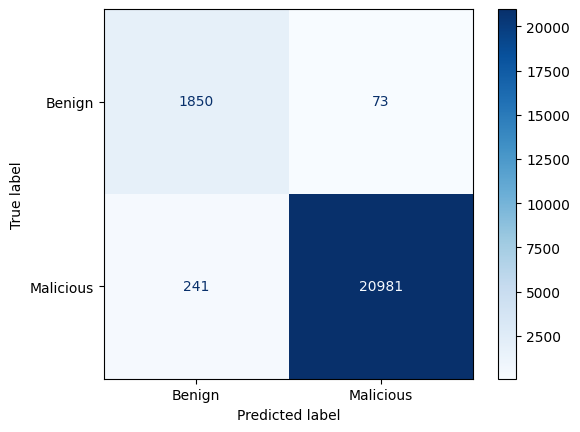

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
labels = ['Benign', 'Malicious']

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [47]:
import joblib

joblib.dump(best_model, "lgbm_model_2.pkl")

['lgbm_model_2.pkl']

In [ ]:
X_train

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,icmp,tcp,udp
752107,-1.000000,NaN,NaN,1.0,40.0,0.0,0.0,False,False,True
86101,-1.000000,NaN,NaN,1.0,40.0,0.0,0.0,False,False,True
838790,2.998566,0.0,0.0,3.0,180.0,0.0,0.0,False,True,False
757800,-1.000000,NaN,NaN,1.0,60.0,0.0,0.0,False,True,False
449715,-1.000000,NaN,NaN,1.0,60.0,0.0,0.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...
259178,2.998788,0.0,0.0,3.0,180.0,0.0,0.0,False,True,False
365838,2.998536,0.0,0.0,3.0,180.0,0.0,0.0,False,True,False
131932,-1.000000,NaN,NaN,1.0,40.0,0.0,0.0,False,False,True
671155,-1.000000,NaN,NaN,1.0,40.0,0.0,0.0,False,False,True


In [ ]:
df[params + [label]].iloc[100].to_dict()

{'duration': 2.998559,
 'orig_bytes': 0.0,
 'resp_bytes': 0.0,
 'orig_pkts': 3.0,
 'orig_ip_bytes': 180.0,
 'resp_pkts': 0.0,
 'resp_ip_bytes': 0.0,
 'icmp': False,
 'tcp': True,
 'udp': False,
 'label_target': 1}

In [59]:
df_train[df_train['label'] == 'DDoS']['id.orig_h'].value_counts()

,count
id.orig_h,
192.168.1.195,12025
192.168.100.111,2974
162.248.88.215,1


In [60]:
emulation_df = df_train[df_train['id.orig_h'] == '192.168.1.195'].sort_values(by='ts')

In [61]:
emulation_df

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,icmp,tcp,udp
1011534,5047,2018-12-21 14:55:39.541642904,CgWRxLnD9A4DVGPhj,192.168.1.195,48986.0,185.244.25.235,6667.0,tcp,irc,48976.819063,...,0.0,ShAdDatfr,606.0,45630.0,1070.0,74159.0,C&C,False,True,False
1006606,119,2018-12-21 15:00:09.843813896,C9JNfI2LrTTIXKmW5d,192.168.1.195,48994.0,185.244.25.235,6667.0,tcp,irc,1.128098,...,0.0,ShAdDaf,7.0,447.0,6.0,563.0,C&C,False,True,False
1006532,45,2018-12-21 15:00:10.924437046,C9PK3i4DqlOcw7lQ68,192.168.1.195,48998.0,185.244.25.235,6667.0,tcp,-,3.097488,...,0.0,S,3.0,180.0,0.0,0.0,C&C,False,True,False
1006534,47,2018-12-21 15:00:18.101866007,CGx9J93gyPXjG9lx6c,192.168.1.195,48998.0,185.244.25.235,6667.0,tcp,-,-1.000000,...,0.0,S,1.0,60.0,0.0,0.0,C&C,False,True,False
1006612,125,2018-12-21 15:00:20.926492929,CH6eOnFInFzV9CnWd,192.168.1.195,49000.0,185.244.25.235,6667.0,tcp,irc,4.095418,...,0.0,ShAdDaf,9.0,567.0,6.0,563.0,C&C,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033700,499421,2019-09-20 22:24:11.839123011,C0Eb5o3YgOR4dQYc2a,192.168.1.195,23138.0,162.248.88.215,62336.0,tcp,-,-1.000000,...,0.0,C,0.0,0.0,0.0,0.0,DDoS,False,True,False
5033707,499428,2019-09-20 22:24:11.840126991,CWV2IM0rtZRJnCV67,192.168.1.195,27531.0,162.248.88.215,62336.0,tcp,-,-1.000000,...,0.0,C,0.0,0.0,0.0,0.0,DDoS,False,True,False
5033755,499476,2019-09-20 22:24:11.845369816,CpsYDI3dZ2Ay0Napq5,192.168.1.195,6949.0,162.248.88.215,62336.0,tcp,-,-1.000000,...,0.0,C,0.0,0.0,0.0,0.0,DDoS,False,True,False
5033766,499487,2019-09-20 22:24:11.846122980,CQ729sE0fqzUaNEMb,192.168.1.195,38970.0,162.248.88.215,62336.0,tcp,-,-1.000000,...,0.0,C,0.0,0.0,0.0,0.0,DDoS,False,True,False


In [62]:
emulation_X = pd.concat([
    emulation_df[emulation_df[label] == "Benign"].iloc[:30],
    emulation_df[emulation_df[label] == "DDoS"].iloc[:30],
])[params + [label]]

In [63]:
emulation_X

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,icmp,tcp,udp,label
1006622,0.001746,48.0,48.0,1.0,76.0,1.0,76.0,False,False,True,Benign
1006653,1.143354,152.0,100178.0,73.0,4696.0,71.0,100982.0,False,True,False,Benign
1007004,0.001499,48.0,48.0,1.0,76.0,1.0,76.0,False,False,True,Benign
1007515,0.001498,48.0,48.0,1.0,76.0,1.0,76.0,False,False,True,Benign
1007870,-1.000000,NaN,NaN,1.0,76.0,0.0,0.0,False,False,True,Benign
1008422,-1.000000,NaN,NaN,1.0,76.0,0.0,0.0,False,False,True,Benign
1008500,0.000747,39.0,103.0,1.0,67.0,1.0,131.0,False,False,True,Benign
1008532,-1.000000,NaN,NaN,1.0,76.0,0.0,0.0,False,False,True,Benign
1008625,5.004134,78.0,0.0,2.0,134.0,0.0,0.0,False,False,True,Benign
1008682,-1.000000,NaN,NaN,1.0,76.0,0.0,0.0,False,False,True,Benign


In [64]:
emulation_X.to_csv('ddos.csv', index=False)

## DNN

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
data = pd.read_csv("./CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv", sep="|")
data['ts'] = pd.to_datetime(data['ts'], unit='s')

data.replace("-", np.nan, inplace=True)
data.fillna(0, inplace=True)
data = data.sort_values(by='ts')

features = [
    "id.orig_p", "id.resp_p", "proto", "duration", "orig_bytes", "resp_bytes",
    "conn_state", "orig_pkts", "orig_ip_bytes", "resp_pkts", "resp_ip_bytes"
]
target = "label"

encoder_proto = LabelEncoder()
data["proto"] = encoder_proto.fit_transform(data["proto"])

encoder_conn = LabelEncoder()
data["conn_state"] = encoder_conn.fit_transform(data["conn_state"])

encoder_label = LabelEncoder()
data["label"] = encoder_label.fit_transform(data["label"])

scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

X = data[features].values
y = data[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

<ipython-input-27-49e2c0060e57>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("-", np.nan, inplace=True)


In [ ]:
class FullyConnectedModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(FullyConnectedModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_dim = X_train.shape[1]
num_classes = len(torch.unique(y_train_tensor))
model = FullyConnectedModel(input_dim, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")

Epoch 1/5, Loss: 0.0401
Epoch 2/5, Loss: 0.0280
Epoch 3/5, Loss: 0.0237
Epoch 4/5, Loss: 0.0219
Epoch 5/5, Loss: 0.0214


In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9958


### LSTM large dataset

In [ ]:
!kaggle datasets download -d abdullahhashmi/iot23

Dataset URL: https://www.kaggle.com/datasets/abdullahhashmi/iot23
License(s): unknown
100% 8.91G/8.91G [01:52<00:00, 178MB/s]
100% 8.91G/8.91G [01:52<00:00, 85.1MB/s]


In [ ]:
!unzip ./iot23.zip

Archive:  ./iot23.zip
  inflating: iot.parquet             
  inflating: panquetdf/CTU-Honeypot-Capture-4-1  
  inflating: panquetdf/CTU-Honeypot-Capture-5-1  
  inflating: panquetdf/CTU-Honeypot-Capture-7-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-1-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-17-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-20-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-21-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-3-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-33-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-34-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-35-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-36-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-39-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-42-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-43-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-44-1  
  inflating: panquetdf/CTU-IoT-Malware-Capture-48-1  
  inflating: panquetdf/CTU-IoT-Malwa

In [ ]:
!ls -lh ./panquetdf/

total 11G
-rw-r--r-- 1 root root  39K Dec 13  2021 CTU-Honeypot-Capture-4-1
-rw-r--r-- 1 root root  88K Dec 13  2021 CTU-Honeypot-Capture-5-1
-rw-r--r-- 1 root root  23K Dec 13  2021 CTU-Honeypot-Capture-7-1
-rw-r--r-- 1 root root  43M Dec 13  2021 CTU-IoT-Malware-Capture-1-1
-rw-r--r-- 1 root root 1.8G Dec 13  2021 CTU-IoT-Malware-Capture-17-1
-rw-r--r-- 1 root root 142K Dec 13  2021 CTU-IoT-Malware-Capture-20-1
-rw-r--r-- 1 root root 152K Dec 13  2021 CTU-IoT-Malware-Capture-21-1
-rw-r--r-- 1 root root 6.4M Dec 13  2021 CTU-IoT-Malware-Capture-3-1
-rw-r--r-- 1 root root 1.8G Dec 13  2021 CTU-IoT-Malware-Capture-33-1
-rw-r--r-- 1 root root 831K Dec 13  2021 CTU-IoT-Malware-Capture-34-1
-rw-r--r-- 1 root root 375M Dec 13  2021 CTU-IoT-Malware-Capture-35-1
-rw-r--r-- 1 root root 452M Dec 13  2021 CTU-IoT-Malware-Capture-36-1
-rw-r--r-- 1 root root 2.6G Dec 13  2021 CTU-IoT-Malware-Capture-39-1
-rw-r--r-- 1 root root 220K Dec 13  2021 CTU-IoT-Malware-Capture-42-1
-rw-r--r-- 1 root root 2

In [ ]:
parquete_list = """
CTU-Honeypot-Capture-4-1
CTU-Honeypot-Capture-5-1
CTU-Honeypot-Capture-7-1
CTU-IoT-Malware-Capture-8-1
CTU-IoT-Malware-Capture-1-1
CTU-IoT-Malware-Capture-3-1
CTU-IoT-Malware-Capture-20-1
CTU-IoT-Malware-Capture-21-1
CTU-IoT-Malware-Capture-42-1
CTU-IoT-Malware-Capture-44-1
CTU-IoT-Malware-Capture-60-1
""".split('\n')[1:-1]
parquete_list

['CTU-Honeypot-Capture-4-1',
 'CTU-Honeypot-Capture-5-1',
 'CTU-Honeypot-Capture-7-1',
 'CTU-IoT-Malware-Capture-8-1',
 'CTU-IoT-Malware-Capture-1-1',
 'CTU-IoT-Malware-Capture-3-1',
 'CTU-IoT-Malware-Capture-20-1',
 'CTU-IoT-Malware-Capture-21-1',
 'CTU-IoT-Malware-Capture-42-1',
 'CTU-IoT-Malware-Capture-44-1',
 'CTU-IoT-Malware-Capture-60-1']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
data = pd.DataFrame()

for path in parquete_list:
    tmp_df = pd.read_parquet(f'./panquetdf/{path}')
    tmp_df['dataset'] = path
    data = pd.concat([data, tmp_df])

In [ ]:
data['label'].value_counts()

,count
label,
Malicious,4277876
Benign,491520


In [ ]:
data['detailed-label'].value_counts()

,count
detailed-label,
DDoS,3578458
PartOfAHorizontalPortScan,685062
-,491520
C&C,8252
Attack,5962
C&C-HeartBeat,95
C&C-Torii,30
C&C-FileDownload,14
FileDownload,3


In [ ]:
data['label'] = data['label'].apply(lambda x: "Benign" if x == "benign" else x)

In [ ]:
data = df.copy()

In [ ]:
data.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label', 'dataset'],
      dtype='object')

In [ ]:
# columns = [
#     "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p",
#     "proto", "service", "duration", "orig_bytes", "resp_bytes",
#     "conn_state", "local_orig", "local_resp", "missed_bytes",
#     "history", "orig_pkts", "orig_ip_bytes", "resp_pkts",
#     "resp_ip_bytes", "tunnel_parents", "label", "detailed_label"
# ]
# data.columns = columns

numeric_columns = [
    "duration", "orig_bytes", "resp_bytes", "orig_pkts",
    "orig_ip_bytes", "resp_pkts", "resp_ip_bytes"
]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

data['ts'] = pd.to_datetime(data['ts'], unit='s', errors='coerce')

data[numeric_columns] = data[numeric_columns].fillna(0)
data['ts'] = data['ts'].fillna(method='ffill')

scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


data['label_target'] = data['label'].apply(lambda x: 1 if x == 'Malicious' else 0)

<ipython-input-51-e5136c6faef0>:18: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['ts'] = pd.to_datetime(data['ts'], unit='s', errors='coerce')
<ipython-input-51-e5136c6faef0>:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['ts'] = data['ts'].fillna(method='ffill')  # Forward fill missing timestamps


In [ ]:
from tqdm import tqdm

def create_sequences(data, numeric_columns, seq_length):
    grouped = data.groupby(['id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto'])

    sequences = []
    sequence_labels = []

    for _, group in tqdm(grouped):
        group = group.sort_values(by='ts')
        features = group[numeric_columns].values
        labels = group['label_target'].values

        if len(features) >= seq_length:
            idx = np.arange(len(features) - seq_length + 1)[:, None] + np.arange(seq_length)
            sequences.append(features[idx])
            sequence_labels.append(labels[seq_length - 1:])

    sequences = np.concatenate(sequences, axis=0)
    sequence_labels = np.concatenate(sequence_labels, axis=0)

    return sequences, sequence_labels

In [ ]:
sequence_length = 10
X, y = create_sequences(data, numeric_columns, sequence_length)

100%|█████████▉| 777008/777010 [20:34<00:00, 629.60it/s]


In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
# y = np.array(y == 'Malicious', dtype=np.float32)

In [ ]:
X.shape

(3008766, 10, 7)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add a dimension for compatibility
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return self.sigmoid(out)

input_size = X_train.shape[2]
hidden_size = 64
num_layers = 2
output_size = 1

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            # print(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

# Evaluation loop
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

epochs = 20
train_model(model, train_loader, criterion, optimizer, epochs)
evaluate_model(model, test_loader)

Epoch [1/20], Loss: 0.0400
Epoch [2/20], Loss: 0.0398
Epoch [3/20], Loss: 0.0398


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

            # Store labels and predictions
            all_labels.extend(y_batch.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Calculate accuracy
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_predictions, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malicious'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    print("Accuracy:", round(100 * accuracy_score(all_labels, all_predictions),2))
    print("Recall:",  round(100 * recall_score(all_labels, all_predictions),2))
    print("Roc Auc:",  round(100 * roc_auc_score(all_labels, all_predictions),2))
    print("F1 score:",  round(100 * f1_score(all_labels, all_predictions),2))
    print(classification_report(all_labels, all_predictions))

<ipython-input-67-173e232988bc>:15: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['ts'] = pd.to_datetime(data['ts'], unit='s', errors='coerce')
<ipython-input-67-173e232988bc>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['ts'] = data['ts'].fillna(method='ffill')
100%|█████████▉| 4662/4663 [00:05<00:00, 867.26it/s]


Test Accuracy: 0.9067


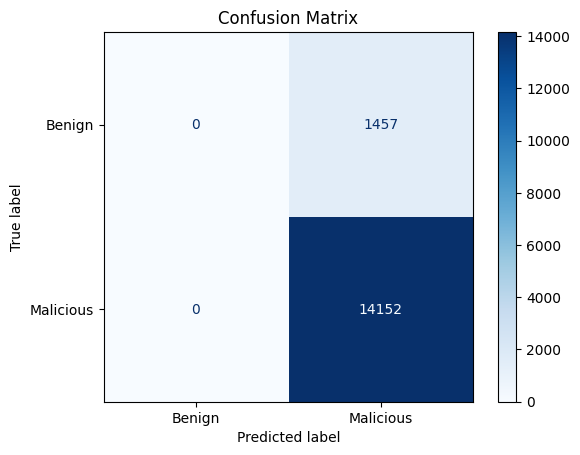

Accuracy: 90.67
Recall: 100.0
Roc Auc: 50.0
F1 score: 95.1
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1457
         1.0       0.91      1.00      0.95     14152

    accuracy                           0.91     15609
   macro avg       0.45      0.50      0.48     15609
weighted avg       0.82      0.91      0.86     15609



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
def preprocess_new_dataset(file_path, numeric_columns, seq_length):
    # Load the new data
    data = pd.read_parquet(file_path)

    columns = [
        "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p",
        "proto", "service", "duration", "orig_bytes", "resp_bytes",
        "conn_state", "local_orig", "local_resp", "missed_bytes",
        "history", "orig_pkts", "orig_ip_bytes", "resp_pkts",
        "resp_ip_bytes", "tunnel_parents", "label", "detailed_label"
    ]
    data.columns = columns
    data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

    data['ts'] = pd.to_datetime(data['ts'], unit='s', errors='coerce')

    data[numeric_columns] = data[numeric_columns].fillna(0)
    data['ts'] = data['ts'].fillna(method='ffill')

    scaler = MinMaxScaler()
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

    data['label_target'] = data['label'].apply(lambda x: 1 if x == 'Malicious' else 0)

    sequences, labels = create_sequences(data, numeric_columns, seq_length)

    return sequences, labels

new_dataset_path = "./panquetdf/CTU-IoT-Malware-Capture-34-1"  # Replace with the new dataset file path
X_new, y_new = preprocess_new_dataset(new_dataset_path, numeric_columns, sequence_length)

X_new_tensor = torch.tensor(X_new, dtype=torch.float32)
y_new_tensor = torch.tensor(y_new, dtype=torch.float32).unsqueeze(1)
new_dataset = TensorDataset(X_new_tensor, y_new_tensor)
new_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

evaluate_model(model, new_loader)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

def prepare_cnn_data(X, seq_length, num_features):
    return X.reshape(X.shape[0], 1, num_features, seq_length)

# Preprocess dataset
# sequence_length = 10
# X, y = create_sequences(data, numeric_columns, sequence_length)  # Use existing create_sequences
X_cnn = prepare_cnn_data(X, seq_length=sequence_length, num_features=len(numeric_columns))

X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42, stratify=y)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add a dimension for compatibility
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define CNN model
class CNNModel(nn.Module):
    def __init__(self, num_features, seq_length):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=(3, 3), padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=(3, 3), padding=1)
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))
        # self.fc1 = nn.Linear(32 * (num_features // 2) * (seq_length // 2), 64)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten for fully connected layers
        # print(x.shape)
        # x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

num_features = X_train.shape[2]
model = CNNModel(num_features=len(numeric_columns), seq_length=sequence_length)
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model_cnn(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

def evaluate_model_cnn(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

epochs = 20
train_model_cnn(model, train_loader, criterion, optimizer, epochs)
evaluate_model_cnn(model, test_loader)


Epoch [1/20], Loss: 0.4326
Epoch [2/20], Loss: 0.4176
Epoch [3/20], Loss: 0.4175
Epoch [4/20], Loss: 0.4171
Epoch [5/20], Loss: 0.4172
Epoch [6/20], Loss: 0.4175
Epoch [7/20], Loss: 0.4170
Epoch [8/20], Loss: 0.4170
Epoch [9/20], Loss: 0.4167
Epoch [10/20], Loss: 0.4166
Epoch [11/20], Loss: 0.4168
Epoch [12/20], Loss: 0.4161
Epoch [13/20], Loss: 0.4162
Epoch [14/20], Loss: 0.4167
Epoch [15/20], Loss: 0.4160
Epoch [16/20], Loss: 0.4162
Epoch [17/20], Loss: 0.4156
Epoch [18/20], Loss: 0.4156
Epoch [19/20], Loss: 0.4151
Epoch [20/20], Loss: 0.4149
Test Accuracy: 0.8536


In [ ]:
X_new = prepare_cnn_data(X_new, seq_length=sequence_length, num_features=len(numeric_columns))
X_new_tensor = torch.tensor(X_new, dtype=torch.float32)
y_new_tensor = torch.tensor(y_new, dtype=torch.float32).unsqueeze(1)
new_dataset = TensorDataset(X_new_tensor, y_new_tensor)
new_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

# Evaluate the model on the new dataset
evaluate_model_cnn(model, new_loader)

Test Accuracy: 0.9067


In [ ]:
del data

### LSTM subdataset

In [ ]:
data = pd.read_csv("./CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv", sep="|")
data.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan


In [ ]:
data['label'].value_counts()

,count
label,
Malicious,539473
Benign,469275


In [ ]:
from tqdm import tqdm

In [ ]:
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path, delimiter='|', header=None)

    columns = [
        "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p",
        "proto", "service", "duration", "orig_bytes", "resp_bytes",
        "conn_state", "local_orig", "local_resp", "missed_bytes",
        "history", "orig_pkts", "orig_ip_bytes", "resp_pkts",
        "resp_ip_bytes", "tunnel_parents", "label", "detailed_label"
    ]
    data.columns = columns

    numeric_columns = [
        "duration", "orig_bytes", "resp_bytes", "orig_pkts",
        "orig_ip_bytes", "resp_pkts", "resp_ip_bytes"
    ]
    data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

    data['ts'] = pd.to_datetime(data['ts'], unit='s', errors='coerce')
    data[numeric_columns] = data[numeric_columns].fillna(0)
    data['ts'] = data['ts'].fillna(method='ffill')

    scaler = MinMaxScaler()
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

    # label_encoder = LabelEncoder()
    # data['label'] = label_encoder.fit_transform(data['label'])
    data['label_target'] = data['label'].apply(lambda x: 1 if x == 'Malicious' else 0)

    return data, numeric_columns

def create_sequences(data, numeric_columns, seq_length):
    grouped = data.groupby(['id.orig_h', 'id.resp_h', 'proto'])

    sequences = []
    sequence_labels = []

    for _, group in tqdm(grouped):
        group = group.sort_values(by='ts')
        features = group[numeric_columns].values
        labels = group['label_target'].values

        if len(features) >= seq_length:
            idx = np.arange(len(features) - seq_length + 1)[:, None] + np.arange(seq_length)
            sequences.append(features[idx])
            sequence_labels.append(labels[seq_length - 1:])

    sequences = np.concatenate(sequences, axis=0)
    sequence_labels = np.concatenate(sequence_labels, axis=0)

    return sequences, sequence_labels

In [ ]:
file_path = "./CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv"  # Replace with your dataset file path
data, numeric_columns = load_and_preprocess_data(file_path)

sequence_length = 7
X, y = create_sequences(data, numeric_columns, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add a dimension for compatibility
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

<ipython-input-25-ba93ac5207ed>:2: DtypeWarning: Columns (0,3,5,14,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter='|', header=None)
<ipython-input-25-ba93ac5207ed>:19: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['ts'] = pd.to_datetime(data['ts'], unit='s', errors='coerce')
<ipython-input-25-ba93ac5207ed>:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['ts'] = data['ts'].fillna(method='ffill')
100%|██████████| 612129/612129 [17:20<00:00, 588.18it/s]


In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
X.shape

(18561, 7, 7)

Epoch [1/20], Loss: 0.0853
Epoch [2/20], Loss: 0.0066
Epoch [3/20], Loss: 0.0072
Epoch [4/20], Loss: 0.0064
Epoch [5/20], Loss: 0.0062
Epoch [6/20], Loss: 0.0054
Epoch [7/20], Loss: 0.0055
Epoch [8/20], Loss: 0.0051
Epoch [9/20], Loss: 0.0062
Epoch [10/20], Loss: 0.0056
Epoch [11/20], Loss: 0.0047
Epoch [12/20], Loss: 0.0055
Epoch [13/20], Loss: 0.0055
Epoch [14/20], Loss: 0.0061
Epoch [15/20], Loss: 0.0058
Epoch [16/20], Loss: 0.0047
Epoch [17/20], Loss: 0.0048
Epoch [18/20], Loss: 0.0053
Epoch [19/20], Loss: 0.0052
Epoch [20/20], Loss: 0.0048
Test Accuracy: 1.0000


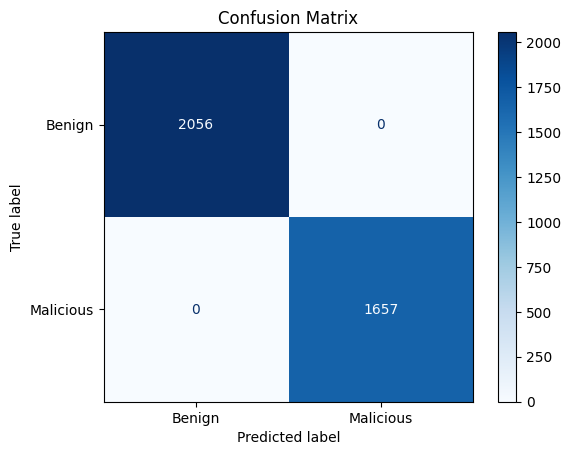

Accuracy: 100.0
Recall: 100.0
Roc Auc: 100.0
F1 score: 100.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2056
         1.0       1.00      1.00      1.00      1657

    accuracy                           1.00      3713
   macro avg       1.00      1.00      1.00      3713
weighted avg       1.00      1.00      1.00      3713



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return self.sigmoid(out)

input_size = X_train.shape[2]
hidden_size = 64
num_layers = 2
output_size = 1

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            # print(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

            # Store labels and predictions
            all_labels.extend(y_batch.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Calculate accuracy
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_predictions, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malicious'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    print("Accuracy:", round(100 * accuracy_score(all_labels, all_predictions),2))
    print("Recall:",  round(100 * recall_score(all_labels, all_predictions),2))
    print("Roc Auc:",  round(100 * roc_auc_score(all_labels, all_predictions),2))
    print("F1 score:",  round(100 * f1_score(all_labels, all_predictions),2))
    print(classification_report(all_labels, all_predictions))

epochs = 20
train_model(model, train_loader, criterion, optimizer, epochs)
evaluate_model(model, test_loader)

<ipython-input-30-a1e9515e8190>:17: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['ts'] = pd.to_datetime(data['ts'], unit='s', errors='coerce')
<ipython-input-30-a1e9515e8190>:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['ts'] = data['ts'].fillna(method='ffill')
100%|██████████| 51/51 [00:00<00:00, 247.19it/s]


Test Accuracy: 0.9221


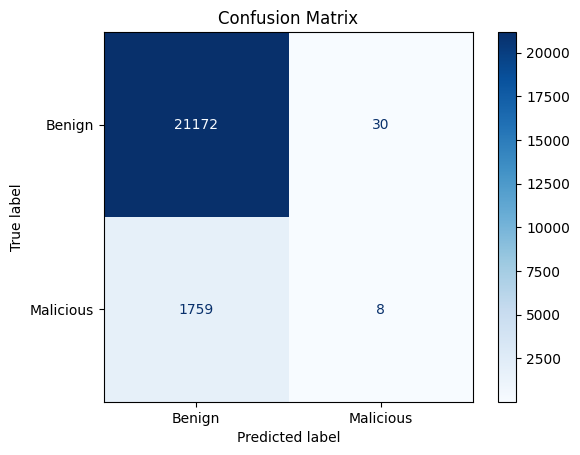

Accuracy: 92.21
Recall: 0.45
Roc Auc: 50.16
F1 score: 0.89
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     21202
         1.0       0.21      0.00      0.01      1767

    accuracy                           0.92     22969
   macro avg       0.57      0.50      0.48     22969
weighted avg       0.87      0.92      0.89     22969



In [ ]:

def preprocess_new_dataset(file_path, numeric_columns, seq_length):
    data = pd.read_csv(file_path, delimiter='|', header=None)

    columns = [
        "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p",
        "proto", "service", "duration", "orig_bytes", "resp_bytes",
        "conn_state", "local_orig", "local_resp", "missed_bytes",
        "history", "orig_pkts", "orig_ip_bytes", "resp_pkts",
        "resp_ip_bytes", "tunnel_parents", "label", "detailed_label"
    ]
    data.columns = columns

    # Convert relevant columns to numeric
    data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Convert timestamp to datetime
    data['ts'] = pd.to_datetime(data['ts'], unit='s', errors='coerce')

    # Fill missing values
    data[numeric_columns] = data[numeric_columns].fillna(0)
    data['ts'] = data['ts'].fillna(method='ffill')

    # Normalize features using the same scaler
    scaler = MinMaxScaler()
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

    data['label_target'] = data['label'].apply(lambda x: 1 if x == 'Benign' else 0)

    # Generate sequences
    sequences, labels = create_sequences(data, numeric_columns, seq_length)

    return sequences, labels

new_dataset_path = "./CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv"  # Replace with the new dataset file path
X_new, y_new = preprocess_new_dataset(new_dataset_path, numeric_columns, sequence_length)

X_new_tensor = torch.tensor(X_new, dtype=torch.float32)
y_new_tensor = torch.tensor(y_new, dtype=torch.float32).unsqueeze(1)
new_dataset = TensorDataset(X_new_tensor, y_new_tensor)
new_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

evaluate_model(model, new_loader)


### CNN

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

def prepare_cnn_data(X, seq_length, num_features):
    return X.reshape(X.shape[0], 1, num_features, seq_length)

# sequence_length = 10
# X, y = create_sequences(data, numeric_columns, sequence_length)  # Use existing create_sequences
X_cnn = prepare_cnn_data(X, seq_length=sequence_length, num_features=len(numeric_columns))

X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42, stratify=y)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add a dimension for compatibility
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class CNNModel(nn.Module):
    def __init__(self, num_features, seq_length):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=(3, 3), padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=(3, 3), padding=1)
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))
        # self.fc1 = nn.Linear(32 * (num_features // 2) * (seq_length // 2), 64)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten for fully connected layers
        # print(x.shape)
        # x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

num_features = X_train.shape[2]
model = CNNModel(num_features=len(numeric_columns), seq_length=sequence_length)
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model_cnn(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

def evaluate_model_cnn(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

epochs = 20
train_model_cnn(model, train_loader, criterion, optimizer, epochs)
evaluate_model_cnn(model, test_loader)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x32 and 64x1)

In [ ]:
X_train_tensor.shape

torch.Size([14611, 1, 7, 10])

In [ ]:
# new_dataset_path = "./CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv"  # Replace with the new dataset file path
# X_new, y_new = preprocess_new_dataset(new_dataset_path, numeric_columns, sequence_length)

X_new = prepare_cnn_data(X_new, seq_length=sequence_length, num_features=len(numeric_columns))
X_new_tensor = torch.tensor(X_new, dtype=torch.float32)
y_new_tensor = torch.tensor(y_new, dtype=torch.float32).unsqueeze(1)
new_dataset = TensorDataset(X_new_tensor, y_new_tensor)
new_loader = DataLoader(new_dataset, batch_size=32, shuffle=False)

evaluate_model_cnn(model, new_loader)

Test Accuracy: 0.9245


In [ ]:
large_df = pd.read_csv("./CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv", sep="|")

In [ ]:
large_df.shape

(10447787, 23)